<h2>Weather in Szeged 2006-2016 - Regression Analysis</h2>
<ul>
    <li>1. Data Munging</li>
    <li>2. Data Preprocessing</li>
    <li>3. Linear Regression </li>
    <li>4. Multiple Linear Regression</li>
    <li>5. Visualisation</li>
 </ul>
    
Original Dataset downloaded from: https://www.kaggle.com/budincsevity/szeged-weather/downloads/szeged-weather.zip/1

### imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h2>Data Munging</h2>

In [40]:
# Read data from CSV
df = pd.read_csv("https://raw.githubusercontent.com/martandsingh/datasets/master/weatherHistory.csv")

In [54]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## df.columns # All columns

In [43]:
df.isnull().sum() # Only precip type has 517 null values

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [44]:
df[df["Precip Type"].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.9820,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.9820,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.9820,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.9820,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.1000,0.0,1002.20,Mostly cloudy until night.
52680,2012-04-12 00:00:00.000 +0200,Mostly Cloudy,NaN,10.100000,10.100000,0.61,11.3666,180.0,16.1000,0.0,1002.25,Light rain in the morning.
52681,2012-04-12 01:00:00.000 +0200,Partly Cloudy,NaN,10.183333,10.183333,0.64,7.2128,150.0,16.1000,0.0,1002.05,Light rain in the morning.
52683,2012-04-12 03:00:00.000 +0200,Mostly Cloudy,NaN,10.700000,10.700000,0.70,14.6993,133.0,16.1000,0.0,1001.42,Light rain in the morning.
52684,2012-04-12 04:00:00.000 +0200,Partly Cloudy,NaN,9.744444,8.022222,0.73,11.9623,142.0,16.1000,0.0,1001.11,Light rain in the morning.
52687,2012-04-12 07:00:00.000 +0200,Mostly Cloudy,NaN,10.055556,10.055556,0.76,13.9748,213.0,11.1090,0.0,1001.22,Light rain in the morning.


In [45]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [46]:
from sklearn.impute import SimpleImputer

In [52]:
# Lets replace all the replace values in Precip Type. As we saw the data type of it is object, which means
# We can not replace missing values with mean or median as object value can not have mean or median.
# So we will here use the third way. We will use Mode or most frequent value to replace all the missing values.
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

In [81]:
X = df.iloc[:, 2:3].values # Gives the array of values of column Precip Type
X

array([['rain'],
       ['rain'],
       ['rain'],
       ...,
       ['rain'],
       ['rain'],
       ['rain']], dtype=object)

In [74]:
imputer = imputer.fit(X)

In [ ]:
df["Precip Type"]

In [75]:
df.iloc[:, 2:3] = imputer.transform(df.iloc[:, 2:3]) 

In [80]:
df["Precip Type"].isnull().sum() # so now we hav replace missing values using our simple imputer

0

In [83]:
# So now we do not have any null values in our dataset ... which is a good thing lets check..
df.isnull().sum() # you can see everything is zero.

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [84]:
# So now our dataset is ready for the next step, wchih is visualisation. 
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [89]:
df.corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


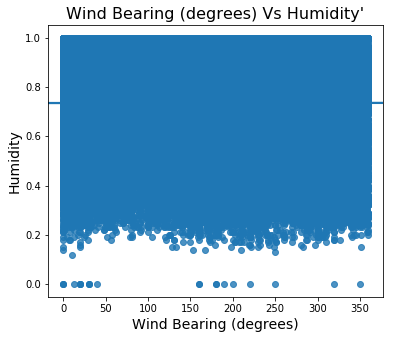

In [92]:
plt.figure(figsize=(6,5))
sns.regplot( df['Wind Bearing (degrees)'],df['Humidity'])
plt.xticks(rotation='horizontal')
plt.xlabel('Wind Bearing (degrees)', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.title("Wind Bearing (degrees) Vs Humidity'", fontsize=16)
plt.show()